In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

In [3]:
# import test and train data
df_train = pd.read_csv('data sources/Black Friday dataset/train.csv')
df_test = pd.read_csv('data sources/Black Friday dataset/test.csv')
print(df_train.shape,df_test.shape)

(550068, 12) (233599, 11)


In [4]:
# Merge train and test datasets
df = pd.concat([df_train,df_test],ignore_index=True)
df.shape

(783667, 12)

In [5]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 783667 entries, 0 to 783666
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     783667 non-null  int64  
 1   Product_ID                  783667 non-null  str    
 2   Gender                      783667 non-null  str    
 3   Age                         783667 non-null  str    
 4   Occupation                  783667 non-null  int64  
 5   City_Category               783667 non-null  str    
 6   Stay_In_Current_City_Years  783667 non-null  str    
 7   Marital_Status              783667 non-null  int64  
 8   Product_Category_1          783667 non-null  int64  
 9   Product_Category_2          537685 non-null  float64
 10  Product_Category_3          237858 non-null  float64
 11  Purchase                    550068 non-null  float64
dtypes: float64(3), int64(4), str(5)
memory usage: 71.7 MB


In [6]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,7.836670e+05,783667.000000,783667.000000,783667.000000,537685.000000,237858.000000,550068.000000
mean,1.003029e+06,8.079300,0.409777,5.366196,9.844506,12.668605,9263.968713
std,1.727267e+03,6.522206,0.491793,3.878160,5.089093,4.125510,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001519e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003075e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [7]:
# since we dont need id, we will drop that col
df.drop(['User_ID'],axis=1,inplace=True)
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [8]:
# converting the categorical feature into numerical
# gender
df['Gender'] = df['Gender'].map({'F':0,'M':1})

In [9]:
df.Age.unique()

<StringArray>
['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25']
Length: 7, dtype: str

In [10]:
## age
# from sklearn import preprocessing
# label_encoder = preprocessing.LabelEncoder()
# df['Age'] = label_encoder.fit_transform(df['Age'])

## OR
df['Age'] = df['Age'].map({'0-17':1,'18-25':2,'26-35':3,'36-45':4,'46-50':5,'51-55':6,'55+':7})
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,1,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,0,1,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,0,1,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,0,1,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,1,7,16,C,4+,0,8,NaN,NaN,7969.0


In [11]:
# city
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df['City_Category'] = label_encoder.fit_transform(df['City_Category'])
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,1,10,0,2,0,3,NaN,NaN,8370.0
1,P00248942,0,1,10,0,2,0,1,6.0,14.0,15200.0
2,P00087842,0,1,10,0,2,0,12,NaN,NaN,1422.0
3,P00085442,0,1,10,0,2,0,12,14.0,NaN,1057.0
4,P00285442,1,7,16,2,4+,0,8,NaN,NaN,7969.0


In [12]:
# handle null values
df.isnull().sum()

Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            245982
Product_Category_3            545809
Purchase                      233599
dtype: int64

In [13]:
# Product_Category_2   & Product_Category_3  needs replacing of missing values

print('Product_Category_2 : ',df.Product_Category_2.unique())
print('Product_Category_3 : ',df.Product_Category_3.unique())

Product_Category_2 :  [nan  6. 14.  2.  8. 15. 16. 11.  5.  3.  4. 12.  9. 10. 17. 13.  7. 18.]
Product_Category_3 :  [nan 14. 17.  5.  4. 16. 15.  8.  9. 13.  6. 12.  3. 18. 11. 10.]


In [14]:
# we see above that both columns have discreet features we will replace nulls with their mode values
print(df.Product_Category_2.value_counts().head())
print(df.Product_Category_3.value_counts().head())

Product_Category_2
8.0     91317
14.0    78834
2.0     70498
16.0    61687
15.0    54114
Name: count, dtype: int64
Product_Category_3
16.0    46469
15.0    39968
14.0    26283
17.0    23818
5.0     23799
Name: count, dtype: int64


In [15]:
print(df['Product_Category_2'].mode())
print(df['Product_Category_3'].mode())

0    8.0
Name: Product_Category_2, dtype: float64
0    16.0
Name: Product_Category_3, dtype: float64


In [16]:
# we see that 8 and 16 are the modes for the columnms respectively
# so we will replace their nulls with modes and then do a value count again, to verify that val count mode increase as nulls are substituted for mode values
df['Product_Category_2']= df['Product_Category_2'].fillna(df['Product_Category_2'].mode()[0])
df['Product_Category_3']= df['Product_Category_3'].fillna(df['Product_Category_3'].mode()[0])
print(df.Product_Category_2.value_counts().head())
print(df.Product_Category_3.value_counts().head())

Product_Category_2
8.0     337299
14.0     78834
2.0      70498
16.0     61687
15.0     54114
Name: count, dtype: int64
Product_Category_3
16.0    592278
15.0     39968
14.0     26283
17.0     23818
5.0      23799
Name: count, dtype: int64


In [17]:
# as we see above the no. of counts of mode have increased as the null vals are sucessfully replaced
# checking if any null values remain
df.isna().sum()

Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2                 0
Product_Category_3                 0
Purchase                      233599
dtype: int64

*All null values are replaced, the 'Purchase' feature has null vals because its a target feature and it should be null in the test part of the df*

In [19]:
df.Stay_In_Current_City_Years.unique()

<StringArray>
['2', '4+', '3', '1', '0']
Length: 5, dtype: str

In [20]:
# replacing '4+' to just '4' to make it numerical
df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].str.replace('+','')

In [21]:
df.Stay_In_Current_City_Years.unique()

<StringArray>
['2', '4', '3', '1', '0']
Length: 5, dtype: str

In [24]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 783667 entries, 0 to 783666
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  783667 non-null  str    
 1   Gender                      783667 non-null  int64  
 2   Age                         783667 non-null  int64  
 3   Occupation                  783667 non-null  int64  
 4   City_Category               783667 non-null  int64  
 5   Stay_In_Current_City_Years  783667 non-null  str    
 6   Marital_Status              783667 non-null  int64  
 7   Product_Category_1          783667 non-null  int64  
 8   Product_Category_2          783667 non-null  float64
 9   Product_Category_3          783667 non-null  float64
 10  Purchase                    550068 non-null  float64
dtypes: float64(3), int64(6), str(2)
memory usage: 65.8 MB


In [40]:
# converting 'Stay_In_Current_City_Years' to integers
df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].astype(int)
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 783667 entries, 0 to 783666
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  783667 non-null  str    
 1   Gender                      783667 non-null  int64  
 2   Age                         783667 non-null  int64  
 3   Occupation                  783667 non-null  int64  
 4   City_Category               783667 non-null  int64  
 5   Stay_In_Current_City_Years  783667 non-null  int64  
 6   Marital_Status              783667 non-null  int64  
 7   Product_Category_1          783667 non-null  int64  
 8   Product_Category_2          783667 non-null  float64
 9   Product_Category_3          783667 non-null  float64
 10  Purchase                    550068 non-null  float64
dtypes: float64(3), int64(7), str(1)
memory usage: 65.8 MB


<Axes: xlabel='Age', ylabel='Purchase'>

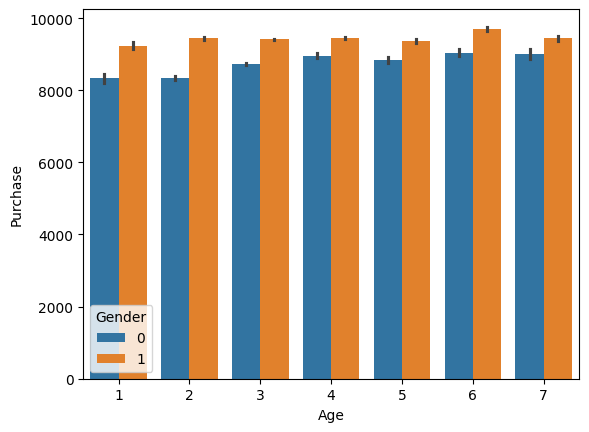

In [ ]:
# viz of age vs purchase
sns.barplot(x='Age', y='Purchase', hue='Gender', data=df)

In [65]:
#dropping the product id
df.drop(['Product_ID'],axis=1,inplace=True)

#### Train Test Split

In [67]:
# making the test dataframe with the entries that dont have / have null values in the target feature column

test_df = df[df['Purchase'].isnull()]
print(test_df.shape)
print(test_df.head(1))

(233599, 10)
        Gender  Age  Occupation  City_Category  Stay_In_Current_City_Years  \
550068       1    5           7              1                           2   

        Marital_Status  Product_Category_1  Product_Category_2  \
550068               1                   1                11.0   

        Product_Category_3  Purchase  
550068                16.0       NaN  


In [72]:
# making the train dataframe by removing the part of data which has null target

train_df = df[~df['Purchase'].isnull()]
print(train_df.shape)
print(train_df.head(1))

(550068, 10)
   Gender  Age  Occupation  City_Category  Stay_In_Current_City_Years  \
0       0    1          10              0                           2   

   Marital_Status  Product_Category_1  Product_Category_2  Product_Category_3  \
0               0                   3                 8.0                16.0   

   Purchase  
0    8370.0  


In [77]:
X= train_df.iloc[:,:-1] # all except last col
print(X.head())
y = train_df.iloc[:,-1] #only last col
print(y.head())


   Gender  Age  Occupation  City_Category  Stay_In_Current_City_Years  \
0       0    1          10              0                           2   
1       0    1          10              0                           2   
2       0    1          10              0                           2   
3       0    1          10              0                           2   
4       1    7          16              2                           4   

   Marital_Status  Product_Category_1  Product_Category_2  Product_Category_3  
0               0                   3                 8.0                16.0  
1               0                   1                 6.0                14.0  
2               0                  12                 8.0                16.0  
3               0                  12                14.0                16.0  
4               0                   8                 8.0                16.0  
0     8370.0
1    15200.0
2     1422.0
3     1057.0
4     7969.0
Name: Purchase, 

In [78]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=42)

#### Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [80]:
## training and testing the model